**MediMentor AI-Powered Medical Diagnosis and Recommendation System**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORTING LIBRARIES

In [ ]:
import  pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
dataset = pd.read_csv('Training.csv')

In [ ]:
dataset

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [ ]:
dataset.shape

(4920, 133)

This code helps is to Splits the dataset into features (X) and the target variable (y).

Then Encodes the target variable 'prognosis' into numerical form.

And then Splits the data into training and test sets with 70% for training and 30% for testing.

In [ ]:
X = dataset.drop('prognosis', axis=1)
y = dataset['prognosis']

le = LabelEncoder()
le.fit(y)
Y = le.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

In [ ]:
models = {                                   # For easy way create a dictionary for the models
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'MultinomialNB': MultinomialNB()
}

for model_name, model in models.items():     # Loop through the models, train, test, and print results

    model.fit(X_train, y_train)              # Train the model
    predictions = model.predict(X_test)


    accuracy = accuracy_score(y_test, predictions)   # Calculate accuracy
    print(f"{model_name} Accuracy: {accuracy}")


    cm = confusion_matrix(y_test, predictions)     # Calculate confusion matrix
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))

    print("\n" + "="*40 + "\n")


SVC Accuracy: 1.0
SVC Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


RandomForest Accuracy: 1.0
RandomForest Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


GradientBoosting Accuracy: 1.0
GradientBoosting Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


KNeighbors Accuracy: 1.0
KNeighbors Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ..

ONLY SELECTING SVC MODEL FOR THE PREDICTION

In [ ]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
ypred = svc.predict(X_test)
accuracy_svc= accuracy_score(y_test,ypred)
print(f"SVC Accuracy: {accuracy_svc}")

SVC Accuracy: 1.0


In [ ]:
pickle.dump(svc,open('svc.pkl','wb'))    # For saving svc in file

In [ ]:
svc = pickle.load(open('svc.pkl','rb'))

TESTING THE MODEL FOR THE BETTER UNDERSTANDING





In [ ]:
print("predicted disease :",svc.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Disease :", y_test[0])

predicted disease : [40]
Actual Disease : 40


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
print("predicted disease :",svc.predict(X_test.iloc[100].values.reshape(1,-1)))
print("Actual Disease :", y_test[100])

predicted disease : [39]
Actual Disease : 39


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ONLY SELECTING RANDOM FOREST MODEL FOR THE PREDICTION

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)     # Initialize and train RandomForest model
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)                         # Predict and evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"RandomForest Accuracy: {accuracy_rf}")


RandomForest Accuracy: 1.0


In [ ]:
pickle.dump(random_forest, open('random_forest.pkl', 'wb'))     # Save the trained RandomForest model to a file
loaded_rf = pickle.load(open('random_forest.pkl', 'rb'))

TESTING THE MODEL FOR THE BETTER UNDERSTANDING

In [ ]:
print("Predicted disease (RandomForest):", loaded_rf.predict(X_test.iloc[0].values.reshape(1, -1)))
print("Actual Disease:", y_test[0])

Predicted disease (RandomForest): [40]
Actual Disease: 40


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


 EDA - Accuracy Comparison Bar Plot

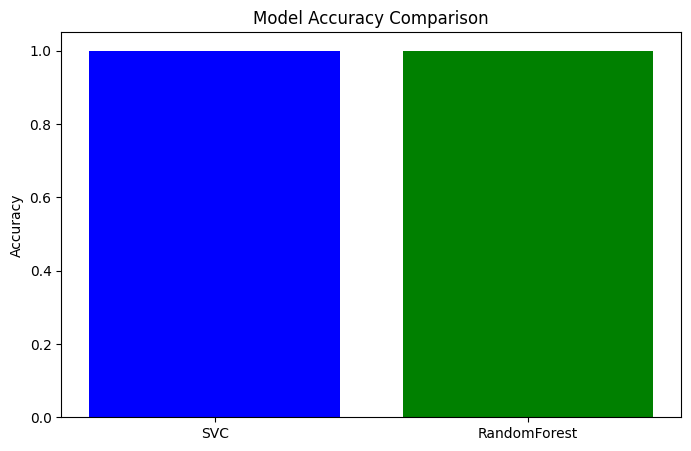

In [ ]:
model_names = ['SVC', 'RandomForest']
accuracies = [accuracy_svc, accuracy_rf]

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['blue', 'green'])       # Creating a bar chart with model names on x-axis and accuracies on y-axis
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

EDA - Confusion Matrix Heatmaps for SVC

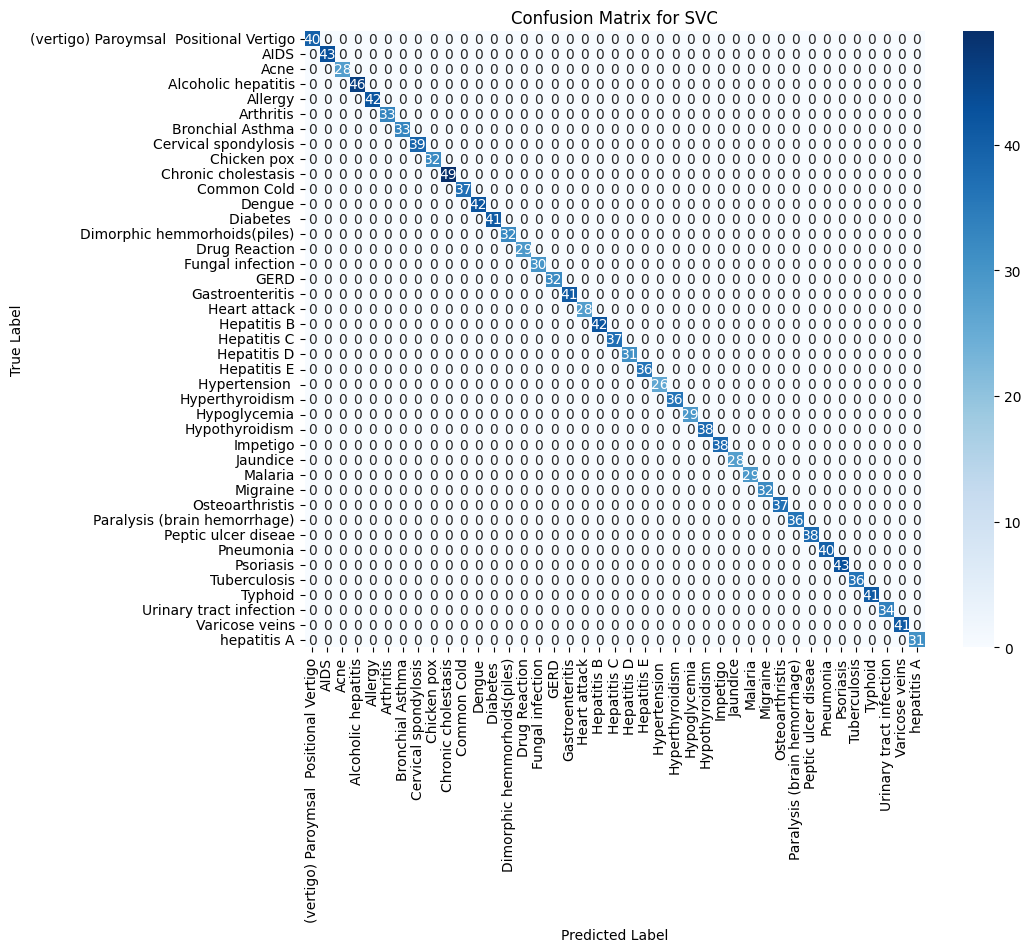

In [ ]:
y_test_labels = le.inverse_transform(y_test)   # Decode y_test and ypred back to original disease names
ypred_labels = le.inverse_transform(ypred)
disease_names = le.classes_  # This will directly get the original names from the LabelEncoder
cm_svc = confusion_matrix(y_test_labels, ypred_labels, labels=disease_names)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues", xticklabels=disease_names, yticklabels=disease_names)
plt.title("Confusion Matrix for SVC")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

EDA - Confusion Matrix Heatmaps for RandomForest

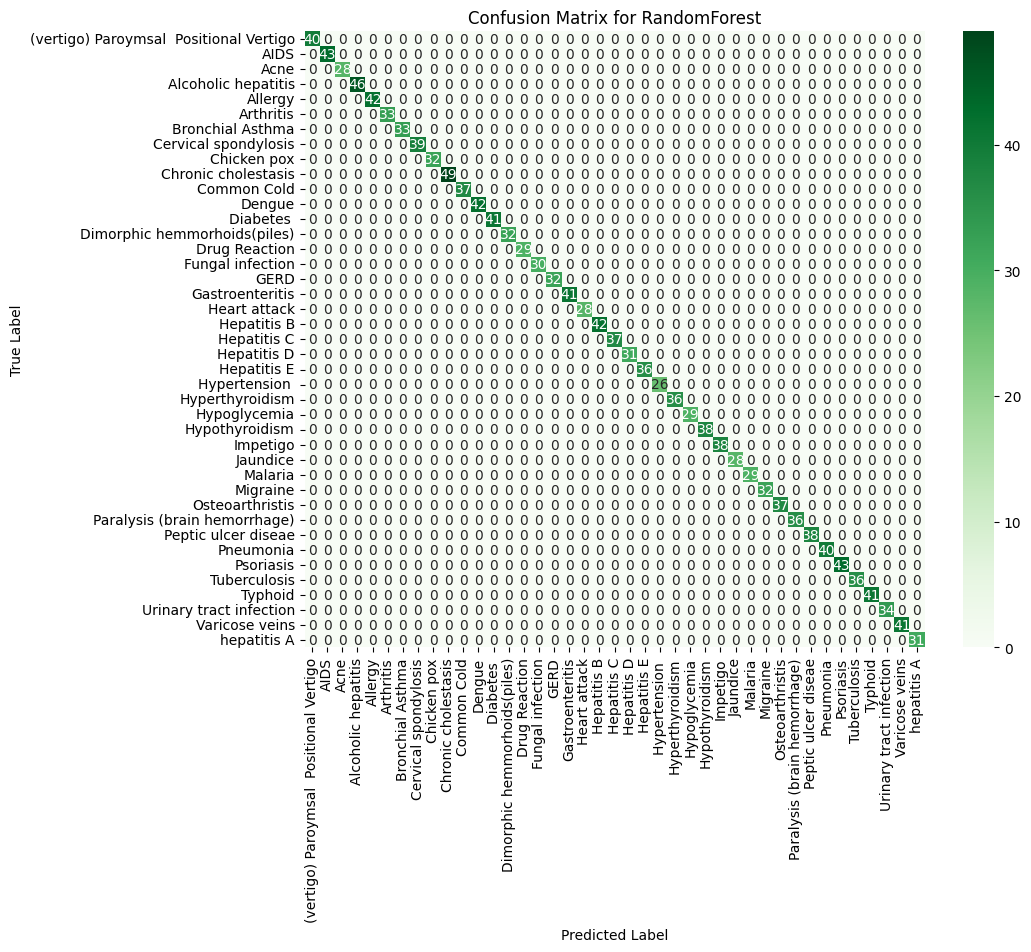

In [ ]:
y_test_labels = le.inverse_transform(y_test)
y_pred_rf_labels = le.inverse_transform(y_pred_rf)
disease_names = le.classes_
cm_rf = confusion_matrix(y_test_labels, y_pred_rf_labels, labels=disease_names)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", xticklabels=disease_names, yticklabels=disease_names)
plt.title("Confusion Matrix for RandomForest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# Load all the other clean datasets for the models

In [ ]:
sym_des = pd.read_csv("symtoms_df.csv")
precautions = pd.read_csv("precautions_df.csv")
workout = pd.read_csv("workout_df.csv")
description = pd.read_csv("description.csv")
medications = pd.read_csv('medications.csv')
diets = pd.read_csv("diets.csv")

In [ ]:

def helper(dis):              # Helper function that takes a disease name and retrieves relevant information from different dataframes.
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]         # Converting precaution columns to a list

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout             # Returning all retrieved information as a tuple

# Dictionary mapping symptom names to integer values for easier reference in machine learning models
symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
# Dictionary mapping disease IDs to disease names for easy reference
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}


def get_predicted_value(patient_symptoms):                # Function to predict disease based on patient symptoms using a trained model
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1           #Use the trained SVC model to predict the disease
    return diseases_list[svc.predict([input_vector])[0]]  #Map the predicted disease index to the disease name

TESTING THE MODEL FOR THE BETTER UNDERSTANDING

In [ ]:

symptoms = input("Enter your symptoms.......")                       # Split the user's input into a list of symptoms (assuming they are comma-separated)
user_symptoms = [s.strip() for s in symptoms.split(',')]
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]  # Remove any extra characters, if any
predicted_disease = get_predicted_value(user_symptoms)                # Fetch the predicted disease based on symptoms

desc, pre, med, die, wrkout = helper(predicted_disease)               # Use helper function to retrieve description, precautions, medications, diets, workouts

print("=================predicted disease============")               #Display results
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:

    print(i, ": ", d_i)
    i += 1
#FOR EXAMPLE :-  itching,skin_rash,nodal_skin_eruptions
#yellow_crust_ooze,red_sore_around_nose,small_dents_in_nails,inflammatory_nails,blister
# vomiting,fatigue

Enter your symptoms.......itching,skin_rash
=================predicted disease============
Fungal infection
=================description==================
Fungal infection is a common skin condition caused by fungi.
=================precautions==================
1 :  bath twice
2 :  use detol or neem in bathing water
3 :  keep infected area dry
4 :  use clean cloths
=================medications==================
5 :  ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']
=================workout==================
6 :  Avoid sugary foods
7 :  Consume probiotics
8 :  Increase intake of garlic
9 :  Include yogurt in diet
10 :  Limit processed foods
11 :  Stay hydrated
12 :  Consume green tea
13 :  Eat foods rich in zinc
14 :  Include turmeric in diet
15 :  Eat fruits and vegetables
=================diets==================
16 :  ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)
desc, pre, med, die, wrkout = helper(predicted_disease)

print("================= Predicted Disease ============")
print(predicted_disease)

print("================= Description ==================")
print(desc)

print("================= Precautions ==================")
for i, p_i in enumerate(pre[0], start=1):
    print(f"{i}: {p_i}")

print("================= Medications ==================")
for i, m_i in enumerate(med, start=1):
    print(f"{i}: {m_i}")

print("================= Workout ==================")
for i, w_i in enumerate(wrkout, start=1):
    print(f"{i}: {w_i}")

print("================= Diets ==================")
for i, d_i in enumerate(die, start=1):
    print(f"{i}: {d_i}")


Enter your symptoms.......mood_swings
================= Predicted Disease ============
Urinary tract infection
================= Description ==================
Urinary tract infection is an infection in any part of the urinary system.
================= Precautions ==================
1: drink plenty of water
2: increase vitamin c intake
3: drink cranberry juice
4: take probiotics
================= Medications ==================
1: ['Antibiotics', 'Urinary analgesics', 'Phenazopyridine', 'Antispasmodics', 'Probiotics']
================= Workout ==================
1: Stay hydrated
2: Consume cranberry products
3: Include vitamin C-rich foods
4: Limit caffeine and alcohol
5: Consume probiotics
6: Avoid spicy and acidic foods
7: Consult a healthcare professional
8: Follow medical recommendations
9: Maintain good hygiene
10: Limit sugary foods and beverages
================= Diets ==================
1: ['UTI Diet', 'Hydration', 'Cranberry juice', 'Probiotics', 'Vitamin C-rich foods']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
